In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import svm
from sklearn.metrics import max_error

In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
cd Power_Forecasting/

/content/drive/MyDrive/Power_Forecasting


In [ ]:
Train_Data = pd.read_csv("Power3.csv")
Test_Data = pd.read_csv("Power_Test1.csv")

In [ ]:
Train_Data

,Date,Month,Year,Day,Occupancy,No. Of Occupants,Hour,Temp,Humidity,Water Heater,AC,Washing Machine,Total Power,PWT,PAC,PWM
0,1,5,2018,1,1,3,0,26,56,0,1,0,4.270,0,4,0
1,1,5,2018,1,1,3,1,26,56,0,1,0,4.270,0,4,0
2,1,5,2018,1,1,3,2,23,62,0,1,0,4.459,0,4,0
3,1,5,2018,1,1,3,3,23,62,0,1,0,4.459,0,4,0
4,1,5,2018,1,1,3,4,23,62,0,1,0,4.459,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,31,5,2018,3,1,2,19,32,32,0,1,0,3.316,0,3,0
740,31,5,2018,3,1,3,20,27,51,1,1,0,7.173,3,4,0
741,31,5,2018,3,1,3,21,27,51,0,1,0,4.063,0,4,0
742,31,5,2018,3,1,3,22,27,51,0,1,0,4.063,0,4,0


In [ ]:
Test_Data

,Date,Month,Year,Day,Occupancy,No. Of Occupants,Hour,Temp,Humidity,Water Heater,AC,Washing Machine,Total Power,PWT,PAC,PWM
0,1,6,2018,4,1,3,0,26,56,0,1,0,4.270,0,4,0
1,1,6,2018,4,1,3,1,26,56,0,1,0,4.270,0,4,0
2,1,6,2018,4,1,3,2,23,62,0,1,0,4.459,0,4,0
3,1,6,2018,4,1,3,3,23,62,0,1,0,4.459,0,4,0
4,1,6,2018,4,1,3,4,23,62,0,1,0,4.459,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,14,6,2018,3,1,2,19,32,32,0,1,0,3.316,0,3,0
332,14,6,2018,3,1,3,20,27,51,1,1,0,7.173,3,4,0
333,14,6,2018,3,1,3,21,27,51,0,1,0,4.063,0,4,0
334,14,6,2018,3,1,3,22,27,51,0,1,0,4.063,0,4,0


**LOAD FORECASTING**

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Water Heater','AC','Washing Machine','Total Power','PWT','PAC','PWM'],axis = 1)
Y_train = Train_Data['Total Power']

In [ ]:
X_test = Test_Data.drop(['Date','Month','Year','Water Heater','AC','Washing Machine','Total Power','PWT','PAC','PWM'],axis = 1)
Y_test = Test_Data['Total Power']

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

52.733906627042245


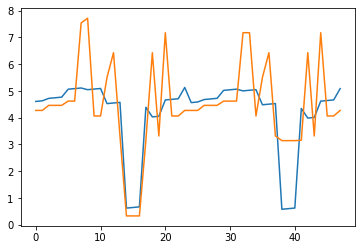

In [ ]:
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred_train_LR = model.predict(X_train)
y_pred_LR = model.predict(X_test)
mape_LR = mean_absolute_percentage_error(Y_test, y_pred_LR)
print(mape_LR)
plt.plot(y_pred_LR[:48])
plt.plot(Y_test[:48])

4.875158188439064e-09


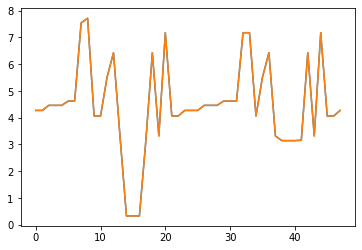

In [ ]:
model= GaussianProcessRegressor()
model.fit(X_train,Y_train)
y_pred_train_GR = model.predict(X_train)
y_pred_GR = model.predict(X_test)
Forecasted_Total_Power = y_pred_GR
mape_GR = mean_absolute_percentage_error(Y_test, y_pred_GR)
print(mape_GR)
plt.plot(y_pred_GR[:48])
plt.plot(Y_test[:48])

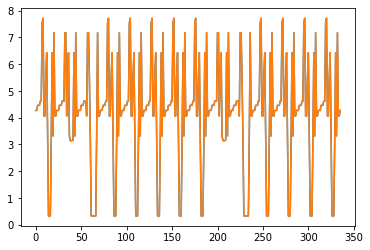

In [ ]:
plt.plot(y_pred_GR)
plt.plot(Y_test)

108.15434625397504


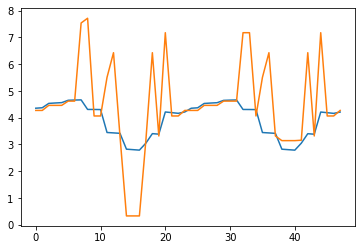

In [ ]:
model = svm.SVR()
model.fit(X_train,Y_train)
y_pred_train_SVM = model.predict(X_train)
y_pred_SVM = model.predict(X_test)
mape_svm = mean_absolute_percentage_error(Y_test, y_pred_SVM)
print(mape_svm)
plt.plot(y_pred_SVM[:48])
plt.plot(Y_test[:48])

120.14454260429477


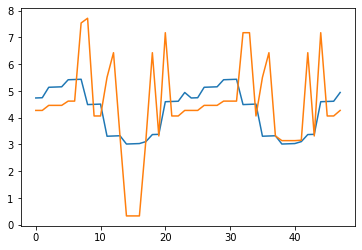

In [ ]:
model = ElasticNet()
model.fit(X_train,Y_train)
y_pred_train_EN = model.predict(X_train)
y_pred_EN = model.predict(X_test)
mape_EN = mean_absolute_percentage_error(Y_test, y_pred_EN)
print(mape_EN)
plt.plot(y_pred_EN[:48])
plt.plot(Y_test[:48])


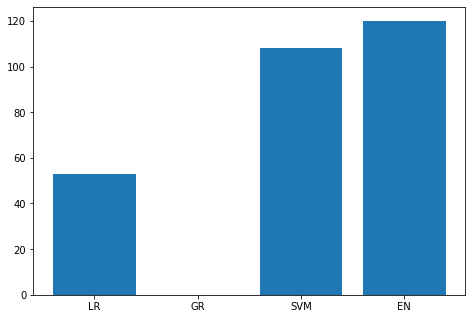

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mtd = ['LR', 'GR', 'SVM', 'EN']
mape = [mape_LR,mape_GR,mape_svm,mape_EN]
ax.bar(mtd,mape)
plt.show()

**LOAD DISAGGREGATION-M1--water heater

```
# This is formatted as code
```

**

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PWT']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PWT']
 

0.5000382547066327


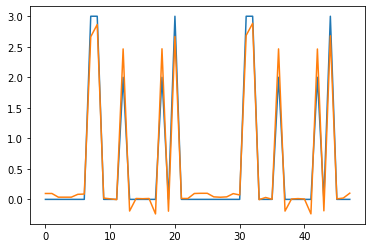

In [ ]:
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_LR = max_error(Y_test, y_pred)
print(mae_LR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PWT']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PWT']
 

2.4098545381434633e-10


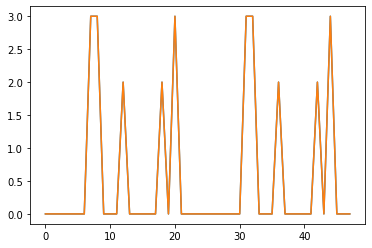

In [ ]:
model= GaussianProcessRegressor()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
Forecasted_WH_Power = y_pred
mae_GR = max_error(Y_test, y_pred)
print(mae_GR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

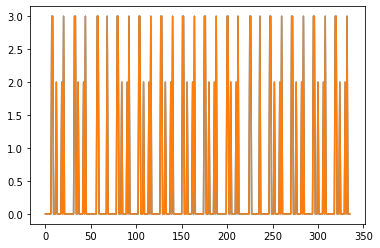

In [ ]:
plt.plot(Y_test)
plt.plot(y_pred)

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PWT']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PWT']
 

1.5276717080392204


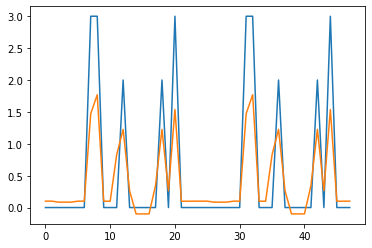

In [ ]:
model = svm.SVR()

model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_SVM = max_error(Y_test, y_pred)
print(mae_SVM)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PWT']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PWT']
 

1.7708192756476697


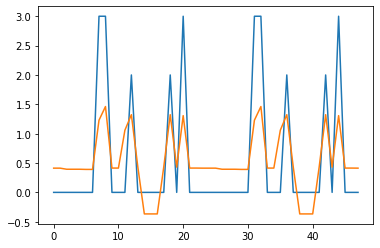

In [ ]:
model = ElasticNet()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_EN = max_error(Y_test, y_pred)
print(mae_EN)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])


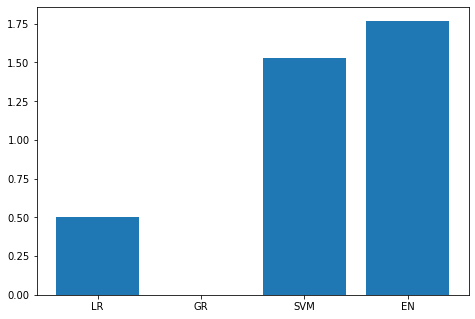

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mtd = ['LR', 'GR', 'SVM', 'EN']
mae = [mae_LR,mae_GR,mae_SVM,mae_EN]
ax.bar(mtd,mae)
plt.show()

**LOAD DISAGGREGATION M-1** ---  Washing Machine

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PWM']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PWM']

2.8568417350048355e-15


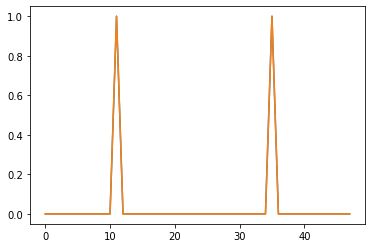

In [ ]:
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
Forecasted_WM_Power = y_pred
mae_LR = max_error(Y_test, y_pred)
print(mae_LR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])


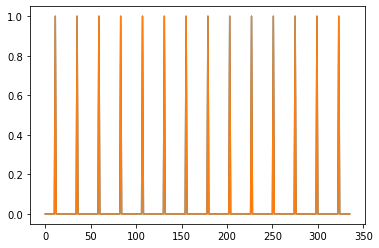

In [ ]:
plt.plot(Y_test)
plt.plot(y_pred)

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PWM']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PWM']
 

5.605504949102169e-11


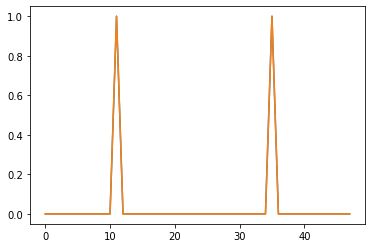

In [ ]:
model= GaussianProcessRegressor()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_GR = max_error(Y_test, y_pred)
print(mae_GR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PWM']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PWM']

0.8587236068642147


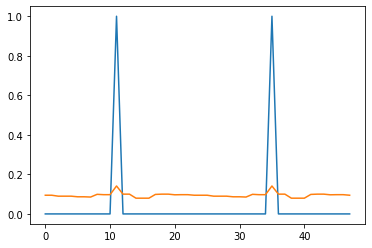

In [ ]:
model = svm.SVR()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_SVM = max_error(Y_test, y_pred)
print(mae_SVM)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PWM']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PWM']

0.9491045281936756


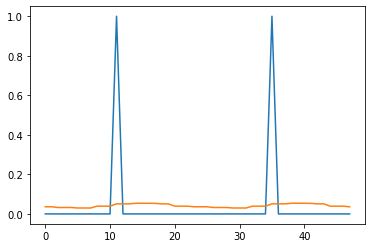

In [ ]:
model = ElasticNet()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae_EN = max_error(Y_test, y_pred)
print(mae_EN)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

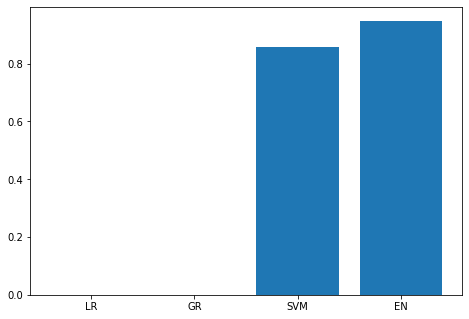

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mtd = ['LR', 'GR', 'SVM', 'EN']
mae = [mae_LR,mae_GR,mae_SVM,mae_EN]
ax.bar(mtd,mae)
plt.show()

**Method 1 (AC)**

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PAC']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PAC']

0.4228454195490876


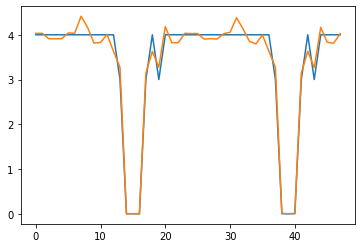

In [ ]:
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_LR = max_error(Y_test, y_pred)
print(mae_LR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PAC']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PAC']

3.211919619161563e-10


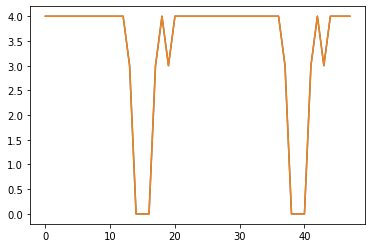

In [ ]:
model= GaussianProcessRegressor()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
Forecasted_AC_Power = y_pred
mae_GR = max_error(Y_test, y_pred)
print(mae_GR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

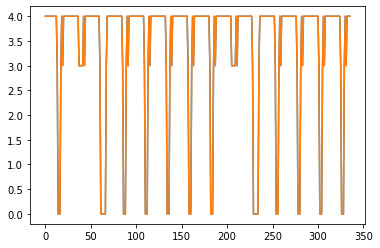

In [ ]:
plt.plot(Y_test)
plt.plot(y_pred)

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PAC']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PAC']

1.7596495066787063


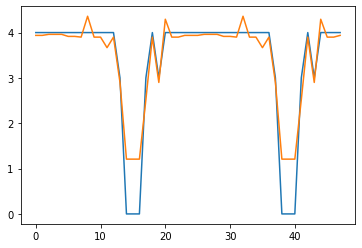

In [ ]:
model = svm.SVR()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_SVM = max_error(Y_test, y_pred)
print(mae_SVM)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_train['Total Power Pred'] = y_pred_train_GR
Y_train = Train_Data['PAC']
X_test = Test_Data.drop(['Date','Month','Year','Day',	'Occupancy','No. Of Occupants',	'Hour','PWT','PAC','PWM'],axis = 1)
X_test['Total Power Pred'] = y_pred_GR
Y_test = Test_Data['PAC']

1.6865665317244194


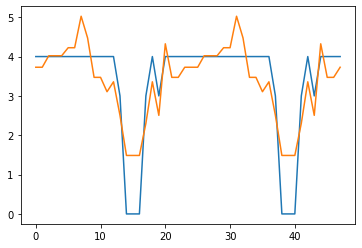

In [ ]:
model = ElasticNet()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_EN = max_error(Y_test, y_pred)
print(mae_EN)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

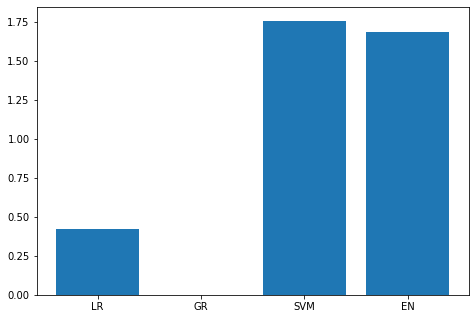

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mtd = ['LR', 'GR', 'SVM', 'EN']
mae = [mae_LR,mae_GR,mae_SVM,mae_EN]
ax.bar(mtd,mae)
plt.show()

**LOAD  DISAGGREGATION M-2**

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','PWT','PAC','PWM'],axis = 1)
Y_train = Train_Data['PWT']
X_test = Test_Data.drop(['Date','Month','Year','PWT','PAC','PWM'],axis = 1)
Y_test = Test_Data['PWT']

0.483773998116952


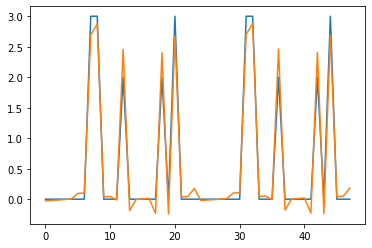

In [ ]:
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae_LR = max_error(Y_test, y_pred)
print(mae_LR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

6.98361368733913e-11


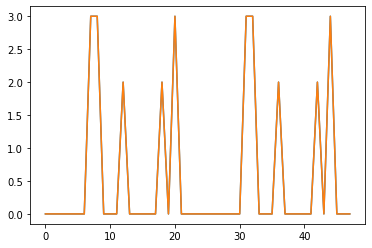

In [ ]:
model= GaussianProcessRegressor()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_GR = max_error(Y_test, y_pred)
print(mae_GR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

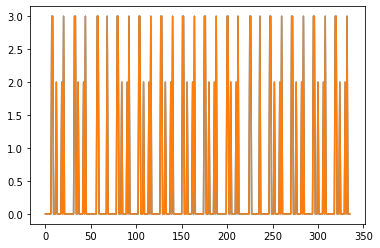

In [ ]:
plt.plot(Y_test)
plt.plot(y_pred)

2.2294479480766576


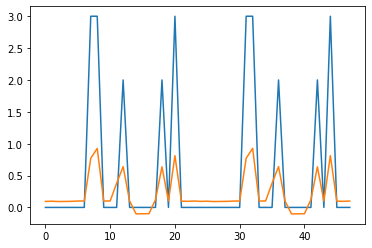

In [ ]:
model = svm.SVR()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_SVM = max_error(Y_test, y_pred)
print(mae_SVM)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

1.814651140806496


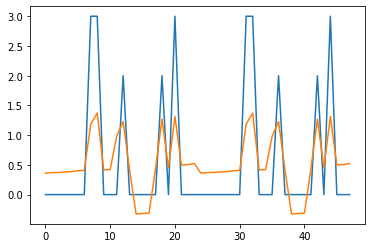

In [ ]:
model = ElasticNet()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_EN = max_error(Y_test, y_pred)
print(mae_EN)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

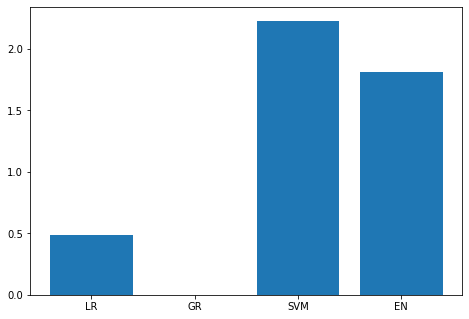

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mtd = ['LR', 'GR', 'SVM', 'EN']
mae = [mae_LR,mae_GR,mae_SVM,mae_EN]
ax.bar(mtd,mae)
plt.show()

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','PWT','PAC','PWM'],axis = 1)
Y_train = Train_Data['PWM']
X_test = Test_Data.drop(['Date','Month','Year','PWT','PAC','PWM'],axis = 1)
Y_test = Test_Data['PWM']

7.736214893871394e-16


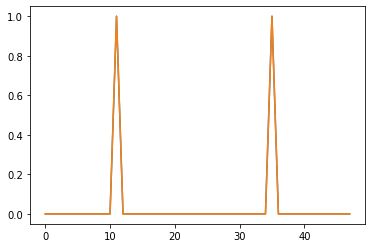

In [ ]:
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_LR = max_error(Y_test, y_pred)
print(mae_LR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

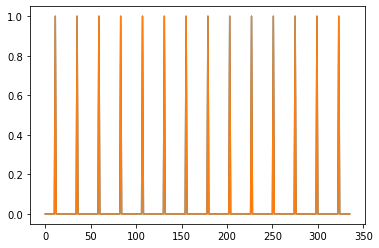

In [ ]:
plt.plot(Y_test)
plt.plot(y_pred)

2.3109736346782483e-11


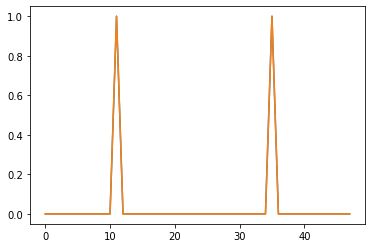

In [ ]:
model= GaussianProcessRegressor()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_GR = max_error(Y_test, y_pred)
print(mae_GR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

0.8387995249881531


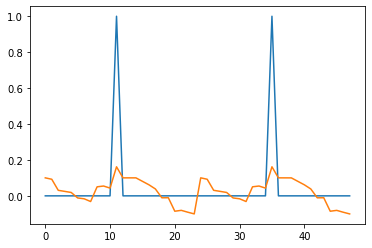

In [ ]:
model = svm.SVR()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_SVM = max_error(Y_test, y_pred)
print(mae_SVM)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

0.9491045281936756


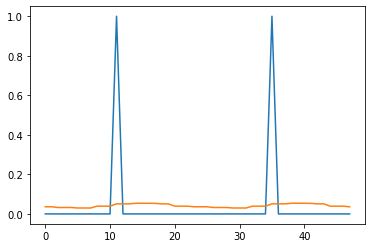

In [ ]:
model = ElasticNet()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_EN = max_error(Y_test, y_pred)
print(mae_EN)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

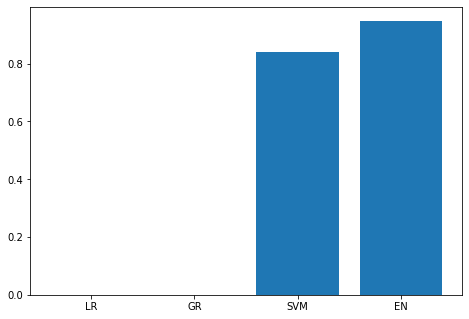

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mtd = ['LR', 'GR', 'SVM', 'EN']
mae = [mae_LR,mae_GR,mae_SVM,mae_EN]
ax.bar(mtd,mae)
plt.show()

In [ ]:
X_train = Train_Data.drop(['Date','Month','Year','PWT','PAC','PWM'],axis = 1)
Y_train = Train_Data['PAC']
X_test = Test_Data.drop(['Date','Month','Year','PWT','PAC','PWM'],axis = 1)
Y_test = Test_Data['PAC']

0.404507969385385


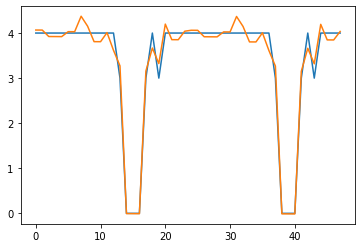

In [ ]:
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_LR = max_error(Y_test, y_pred)
print(mae_LR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

9.270939571592862e-11


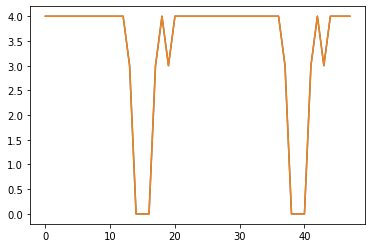

In [ ]:
model= GaussianProcessRegressor()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_GR = max_error(Y_test, y_pred)
print(mae_GR)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])


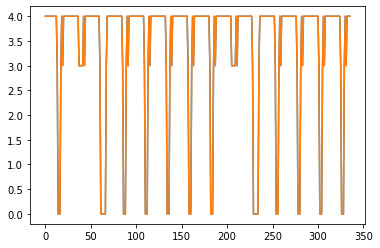

In [ ]:
plt.plot(Y_test)
plt.plot(y_pred)

2.3051515584157922


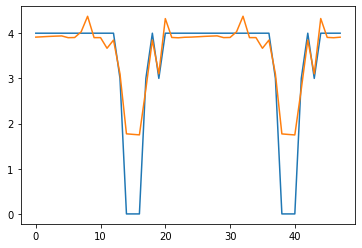

In [ ]:
model = svm.SVR()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_SVM = max_error(Y_test, y_pred)
print(mae_SVM)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

1.7462676035942577


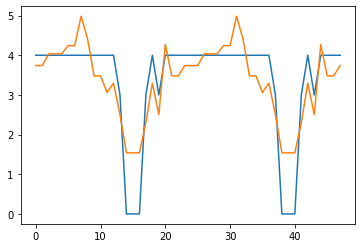

In [ ]:
model = ElasticNet()
model.fit(X_train,Y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
mae_EN = max_error(Y_test, y_pred)
print(mae_EN)
plt.plot(Y_train[:48])
plt.plot(y_pred_train[:48])

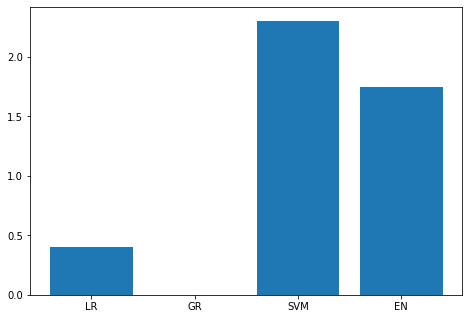

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mtd = ['LR', 'GR', 'SVM', 'EN']
mae = [mae_LR,mae_GR,mae_SVM,mae_EN]
ax.bar(mtd,mae)
plt.show()

In [ ]:
#Random number Generator
from numpy.random import seed
from numpy.random import randint
seed(1)
Cost = randint(10, 25, 24)
print(Cost)

[15 21 22 18 19 21 15 10 10 11 22 17 23 22 16 19 12 14 24 15 12 14 21 22]


In [ ]:
df2 = pd.DataFrame()
df2['Forecasted Total Power']= Forecasted_Total_Power
df2['Predicted WH Power'] = Forecasted_WH_Power
df2['Predicted WM Power'] = Forecasted_WM_Power
df2['predicted AC Power'] = Forecasted_AC_Power
#df2['Tarrif'] = Cost
df2

,Forecasted Total Power,Predicted WH Power,Predicted WM Power,predicted AC Power
0,4.270,-2.026427e-20,9.292756e-16,4.0
1,4.270,-2.025434e-20,9.292756e-16,4.0
2,4.459,-3.880258e-18,1.869806e-15,4.0
3,4.459,3.314440e-18,1.869126e-15,4.0
4,4.459,-3.871364e-18,1.869806e-15,4.0
...,...,...,...,...
331,3.316,-3.240064e-13,-2.132067e-15,3.0
332,7.173,3.000000e+00,6.410099e-16,4.0
333,4.063,1.474515e-16,3.204877e-16,4.0
334,4.063,-5.438358e-15,3.206796e-16,4.0


In [ ]:
df2 = df2.iloc[0:24]
df2

,Forecasted Total Power,Predicted WH Power,Predicted WM Power,predicted AC Power
0,4.270,-2.026427e-20,9.292756e-16,4.000000e+00
1,4.270,-2.025434e-20,9.292756e-16,4.000000e+00
2,4.459,-3.880258e-18,1.869806e-15,4.000000e+00
3,4.459,3.314440e-18,1.869126e-15,4.000000e+00
4,4.459,-3.871364e-18,1.869806e-15,4.000000e+00
5,4.618,-2.119104e-13,2.380775e-15,4.000000e+00
6,4.618,3.239076e-13,2.377135e-15,4.000000e+00
7,7.536,3.000000e+00,2.685808e-15,4.000000e+00
8,7.713,3.000000e+00,6.904736e-16,4.000000e+00
9,4.063,1.139869e-13,3.165735e-16,4.000000e+00


In [ ]:
df2['Tariff'] = Cost
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Forecasted Total Power,Predicted WH Power,Predicted WM Power,predicted AC Power,Tariff
0,4.270,-2.026427e-20,9.292756e-16,4.000000e+00,15
1,4.270,-2.025434e-20,9.292756e-16,4.000000e+00,21
2,4.459,-3.880258e-18,1.869806e-15,4.000000e+00,22
3,4.459,3.314440e-18,1.869126e-15,4.000000e+00,18
4,4.459,-3.871364e-18,1.869806e-15,4.000000e+00,19
5,4.618,-2.119104e-13,2.380775e-15,4.000000e+00,21
6,4.618,3.239076e-13,2.377135e-15,4.000000e+00,15
7,7.536,3.000000e+00,2.685808e-15,4.000000e+00,10
8,7.713,3.000000e+00,6.904736e-16,4.000000e+00,10
9,4.063,1.139869e-13,3.165735e-16,4.000000e+00,11


In [ ]:
p1 = df2.iloc[0:7]
p2 = df2.iloc[7:21]
p3 = df2.iloc[21:24]

In [ ]:
p21 = p1.drop(['Forecasted Total Power'],axis = 1)
p22 = p2.drop(['Tariff'],axis = 1)

In [ ]:
p22.sort_values("Forecasted Total Power", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
p21.sort_values("Tariff", axis = 0, ascending = True,
                 inplace = True, na_position ='last')